                                 *Azheimer's disease analysis and prediction*
--------------------------------------------------------------------------------------------------------------------------------

Importing the Libratries:
-------------------------

In [1049]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier  
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, accuracy_score

In [923]:
df=pd.read_csv("alzheimers_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


Understanding the dataset:
--------------

**Overview of the Dataset:**
*This dataset focuses on predicting Alzheimer's disease progression based on various features.*
*Features extracted from participants in the Alzheimer's Disease Neuroimaging Initiative (ADNI).*
*It aims to assist researchers and healthcare professionals in understanding and predicting Alzheimer's disease.*

In [925]:
df.shape

(2149, 35)

In [927]:
df.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [929]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [1096]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [933]:
df['DoctorInCharge'].value_counts()

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

In [937]:
df['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [939]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [941]:
#Looking for null values in the dataset
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [943]:
#Looking for duplicates in the dataset
df.duplicated().sum()

0

Initial Data Exploration:
----------------------------------


*The dataset contains a total of 2,149 observations.
*All values in the dataset are non-null and numerical.
*There are no duplicate records.
*After removing the PatientID','Ethnicity','Gender'and 'EducationLevel' columns, the dataset consists of 30 features.
*Numerical Columns-15
*Categorical columns-14
*Diagnosis-Target
*nunique-->To find unique values in a series or dataframe 

In [1327]:
#To get numerical columns
numerical_columns = []
for col in df.columns:
    if df[col].nunique() > 10:
        numerical_columns.append(col)
print(numerical_columns)
print(len(numerical_columns))
num_df=pd.DataFrame(numerical_columns)
num_df

['PatientID', 'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
16


,0
0,PatientID
1,Age
2,BMI
3,AlcoholConsumption
4,PhysicalActivity
5,DietQuality
6,SleepQuality
7,SystolicBP
8,DiastolicBP
9,CholesterolTotal


In [1329]:
#To get the categorical columns
categorical_columns = []
for col in df.columns:
    if col not in numerical_columns and col != 'Diagnosis':
        categorical_columns.append(col)
print(categorical_columns)
print(len(categorical_columns))
cat_df=pd.DataFrame(categorical_columns)
cat_df

['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'DoctorInCharge']
18


,0
0,Gender
1,Ethnicity
2,EducationLevel
3,Smoking
4,FamilyHistoryAlzheimers
5,CardiovascularDisease
6,Diabetes
7,Depression
8,HeadInjury
9,Hypertension


In [1331]:
df1=df.copy()

In [1333]:
df1.drop(columns=['PatientID','Ethnicity','Gender','EducationLevel','DoctorInCharge'],inplace=True)

In [1335]:
df1

,Age,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,0,0,1,...,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,0,0,0,...,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,1,0,0,...,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,0.851625,1,0.376930,1.227995,0.839804,0.760833,0,0,0,...,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,0,0,0,...,0.333665,0,0,-1.684679,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,-1.547463,1.589030,0,-1.472807,-0.304649,0.537127,0.274767,0,0,0,...,-1.674022,0,0,-0.166194,1,0,0,0,0,1
2145,0.010147,-1.357833,0,1.516149,-1.246106,-0.718090,0.853112,0,0,0,...,1.247350,0,1,1.431627,0,0,0,0,0,1
2146,0.232663,-1.687864,0,-0.945836,1.738405,1.075131,-0.726886,0,0,0,...,-1.074634,0,0,0.018099,0,0,0,0,0,1
2147,0.343921,-1.712334,0,-0.237109,0.502036,-1.282402,0.721313,0,1,0,...,0.032446,0,0,-0.406078,0,0,0,0,1,1


Feature Selection:
-----------------------

Feature Selection:
x-->Features
The features we have selected are :
Age', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers'  'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury   'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTota    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MM     'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', '      'Confusion', 'Disorientation', 'PersonalityCha       'DifficultyCompletingTasks', 'Forgetfosis'],

In [1339]:
x=df3.iloc[:,:-1]
x.T

,0,1,2,3,4,5,6,7,8,9,...,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148
Age,-0.212368,1.567757,-0.212368,-0.101111,1.567757,1.233984,-0.768658,0.010147,-0.323626,1.345242,...,-0.768658,1.567757,-0.323626,1.456499,-0.991173,-1.547463,0.010147,0.232663,0.343921,-0.323626
BMI,-0.655225,-0.114751,-1.366428,0.851625,-0.961607,0.411764,1.487290,-1.230597,0.024598,1.081051,...,-1.361843,0.937770,-0.839212,-1.047443,0.603971,1.589030,-1.357833,-1.687864,-1.712334,0.780797
Smoking,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AlcoholConsumption,0.565923,-0.954895,1.653006,0.376930,1.461793,-1.024794,-1.631769,0.640031,0.369735,1.040419,...,-1.225850,-0.394116,1.624635,-1.033599,-0.126939,-1.472807,1.516149,-0.945836,-0.237109,-0.373267
PhysicalActivity,0.492525,0.945093,1.023896,1.227995,0.486696,-1.648555,1.518450,-0.094783,-1.186351,0.532315,...,1.216381,-1.390722,1.141690,0.864487,-0.198773,-0.304649,-1.246106,1.738405,0.502036,0.577902
DietQuality,-1.253593,-1.538442,-1.088855,0.839804,-1.443293,-1.171861,0.310912,1.151420,0.599559,1.063438,...,-1.607635,0.254094,0.566315,-0.727003,0.151025,0.537127,-0.718090,1.075131,-1.282402,1.013715
SleepQuality,1.119918,0.056836,1.487380,0.760833,-0.824566,0.119598,-0.892371,-1.609535,-0.738932,0.283974,...,-0.745422,-1.209940,0.020991,-0.442036,1.459440,0.274767,0.853112,-0.726886,0.721313,1.603726
FamilyHistoryAlzheimers,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CardiovascularDisease,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Diabetes,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Target:
-----------------
Target-->Diagnosis

In [1342]:
y=df1.iloc[:,-1:]
y

,Diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
2144,1
2145,1
2146,1
2147,1


Exploring Correlations:
--------------------------

In [1345]:
cor=df1.corr()
cor

,Age,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.000000,-0.015677,0.020060,0.007323,-0.010249,-0.023386,0.049139,-0.018784,-0.015284,-0.005708,...,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
BMI,-0.015677,1.000000,0.020437,-0.008997,0.000742,0.019922,-0.005975,0.006446,-0.005467,-0.008980,...,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.020060,0.020437,1.000000,0.008363,0.010760,-0.002048,-0.001145,-0.045811,0.027955,-0.035810,...,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,0.007323,-0.008997,0.008363,1.000000,0.021696,0.020117,-0.003873,-0.003707,-0.023632,0.000073,...,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.010249,0.000742,0.010760,0.021696,1.000000,0.011085,-0.001823,-0.014106,0.003976,0.029880,...,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.023386,0.019922,-0.002048,0.020117,0.011085,1.000000,0.051295,-0.011261,-0.015220,0.009192,...,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506
SleepQuality,0.049139,-0.005975,-0.001145,-0.003873,-0.001823,0.051295,1.000000,0.014801,0.002112,0.023987,...,0.029589,-0.016807,-0.019899,0.014535,0.013508,0.019467,-0.016892,0.011237,0.002930,-0.056548
FamilyHistoryAlzheimers,-0.018784,0.006446,-0.045811,-0.003707,-0.014106,-0.011261,0.014801,1.000000,0.020783,-0.023106,...,-0.004650,-0.028348,-0.023558,0.014041,0.017976,0.035963,0.006839,0.008787,0.022339,-0.032900
CardiovascularDisease,-0.015284,-0.005467,0.027955,-0.023632,0.003976,-0.015220,0.002112,0.020783,1.000000,-0.010134,...,-0.041270,0.031061,-0.016803,-0.012918,0.017658,0.025237,-0.032343,0.024684,0.010170,0.031490
Diabetes,-0.005708,-0.008980,-0.035810,0.000073,0.029880,0.009192,0.023987,-0.023106,-0.010134,1.000000,...,0.043548,-0.017280,-0.027927,0.022235,-0.004793,-0.004494,0.004184,-0.001466,-0.007644,-0.031508


HEATMAP:
--------------

*The heatmap reveals that the features do not have any strong correlations among themselves. 
*There are five columns that show a correlation with the target variable.
*MMSE,FunctionalAssesment,,MemoryComplaints,BehavioralProblems,ADL

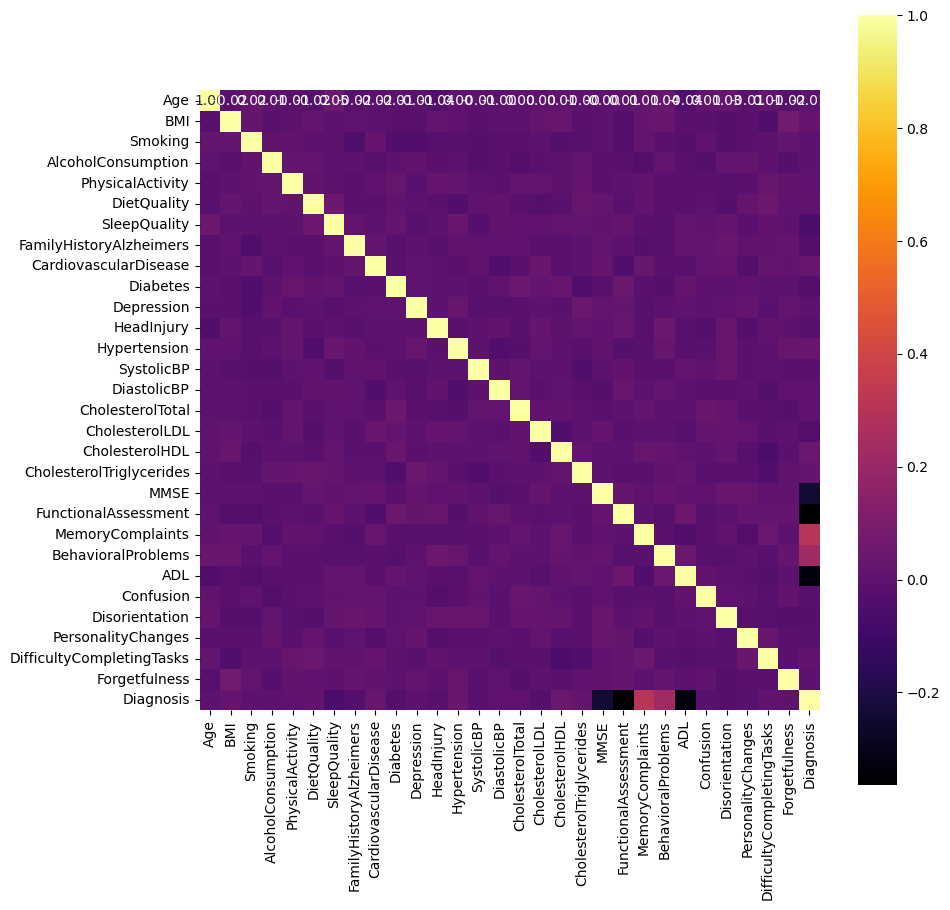

In [1349]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,cmap='inferno',annot = True,fmt="0.2f",square=True)
plt.show()

In [1312]:
numerical_columns = []
for col in df.columns:
    if df[col].nunique() > 10:
        numerical_columns.append(col)
#print(numerical_columns)

standard_scaler = StandardScaler()
df1[numerical_columns] = standard_scaler.fit_transform(df1[numerical_columns])

In [1316]:
df1

,Age,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,PatientID
0,-0.212368,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,0,0,1,...,0,0,-1.104434,0,0,0,1,0,0,-1.731245
1,1.567757,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,0,0,0,...,0,0,-0.810601,0,0,0,0,1,0,-1.729633
2,-0.212368,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,1,0,0,...,0,0,0.724491,0,1,0,1,0,0,-1.728021
3,-0.101111,0.851625,1,0.376930,1.227995,0.839804,0.760833,0,0,0,...,0,1,0.508044,0,0,0,0,0,0,-1.726409
4,1.567757,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,0,0,0,...,0,0,-1.684679,0,0,1,1,0,0,-1.724797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,-1.547463,1.589030,0,-1.472807,-0.304649,0.537127,0.274767,0,0,0,...,0,0,-0.166194,1,0,0,0,0,1,1.724797
2145,0.010147,-1.357833,0,1.516149,-1.246106,-0.718090,0.853112,0,0,0,...,0,1,1.431627,0,0,0,0,0,1,1.726409
2146,0.232663,-1.687864,0,-0.945836,1.738405,1.075131,-0.726886,0,0,0,...,0,0,0.018099,0,0,0,0,0,1,1.728021
2147,0.343921,-1.712334,0,-0.237109,0.502036,-1.282402,0.721313,0,1,0,...,0,0,-0.406078,0,0,0,0,1,1,1.729633


Modelling
-----------------


Models selected:
1.Logistic Regression
2.Decision Tree
3.Naive's Bayes theorem
4.Support Vectoe Machine
5.Random Forest

In [1261]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [1263]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [1265]:
#Finding the y-pred
y_pred=log.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,

In [1367]:
#Finding the accuracy for Logistic regression
logistic_acc=accuracy_score(y_test,y_pred)
logistic_acc*100

95.81395348837209

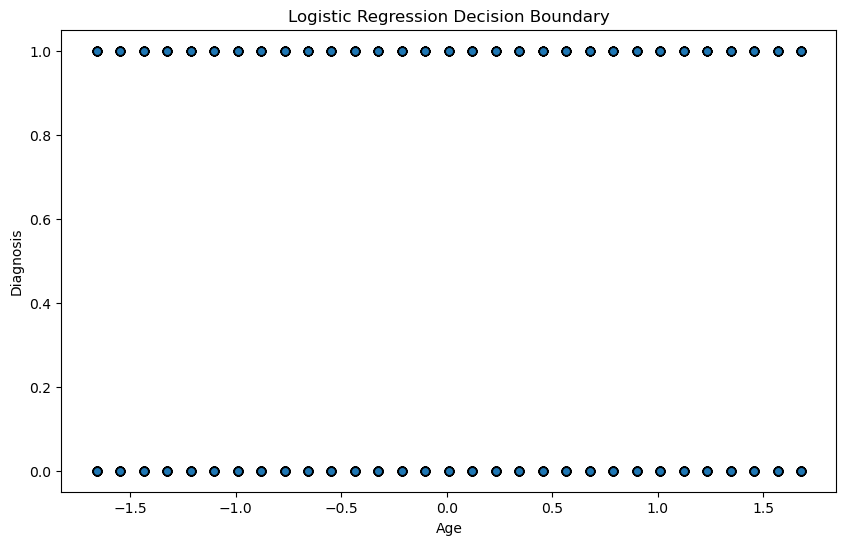

In [1417]:
plt.figure(figsize=(10, 6))
#plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlBu')
plt.scatter(x['Age'], y['Diagnosis'], edgecolors='k', marker='o', cmap='RdYlBu')
plt.xlabel('Age')  
plt.ylabel('Diagnosis')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [1369]:
clf=DecisionTreeClassifier()

In [1371]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [1373]:
y_hat=ypd=clf.predict(x_test)
y_hat

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [1375]:
decision_tree_acc=accuracy_score(y_hat,y_test)
decision_tree_acc*100

90.69767441860465

In [1377]:
#Naive's Bayes Theorem 
bayes=GaussianNB()

In [1279]:
bayes.fit(x_train,y_train)

GaussianNB()

In [1281]:
y_hat=bayes.predict(x_test)
y_hat

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,

In [1283]:
bayes_acc=accuracy_score(y_hat,y_test)
bayes_acc*100

78.13953488372093

In [1285]:
#Support Vector Classifier

In [1287]:
svc=SVC(kernel='linear')
svc

SVC(kernel='linear')

In [1289]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [1291]:
y_pred = svc.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,

In [1293]:
Svc_acc=accuracy_score(y_pred,y_test)
Svc_acc*100

85.11627906976744

In [1295]:
#Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 100,random_state=42) 
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [1296]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [1381]:
#Accuracy for Random Forest
Random_forest_acc=accuracy_score(y_test,y_pred)
Random_forest_acc*100

95.81395348837209

Plotting:
-----------------

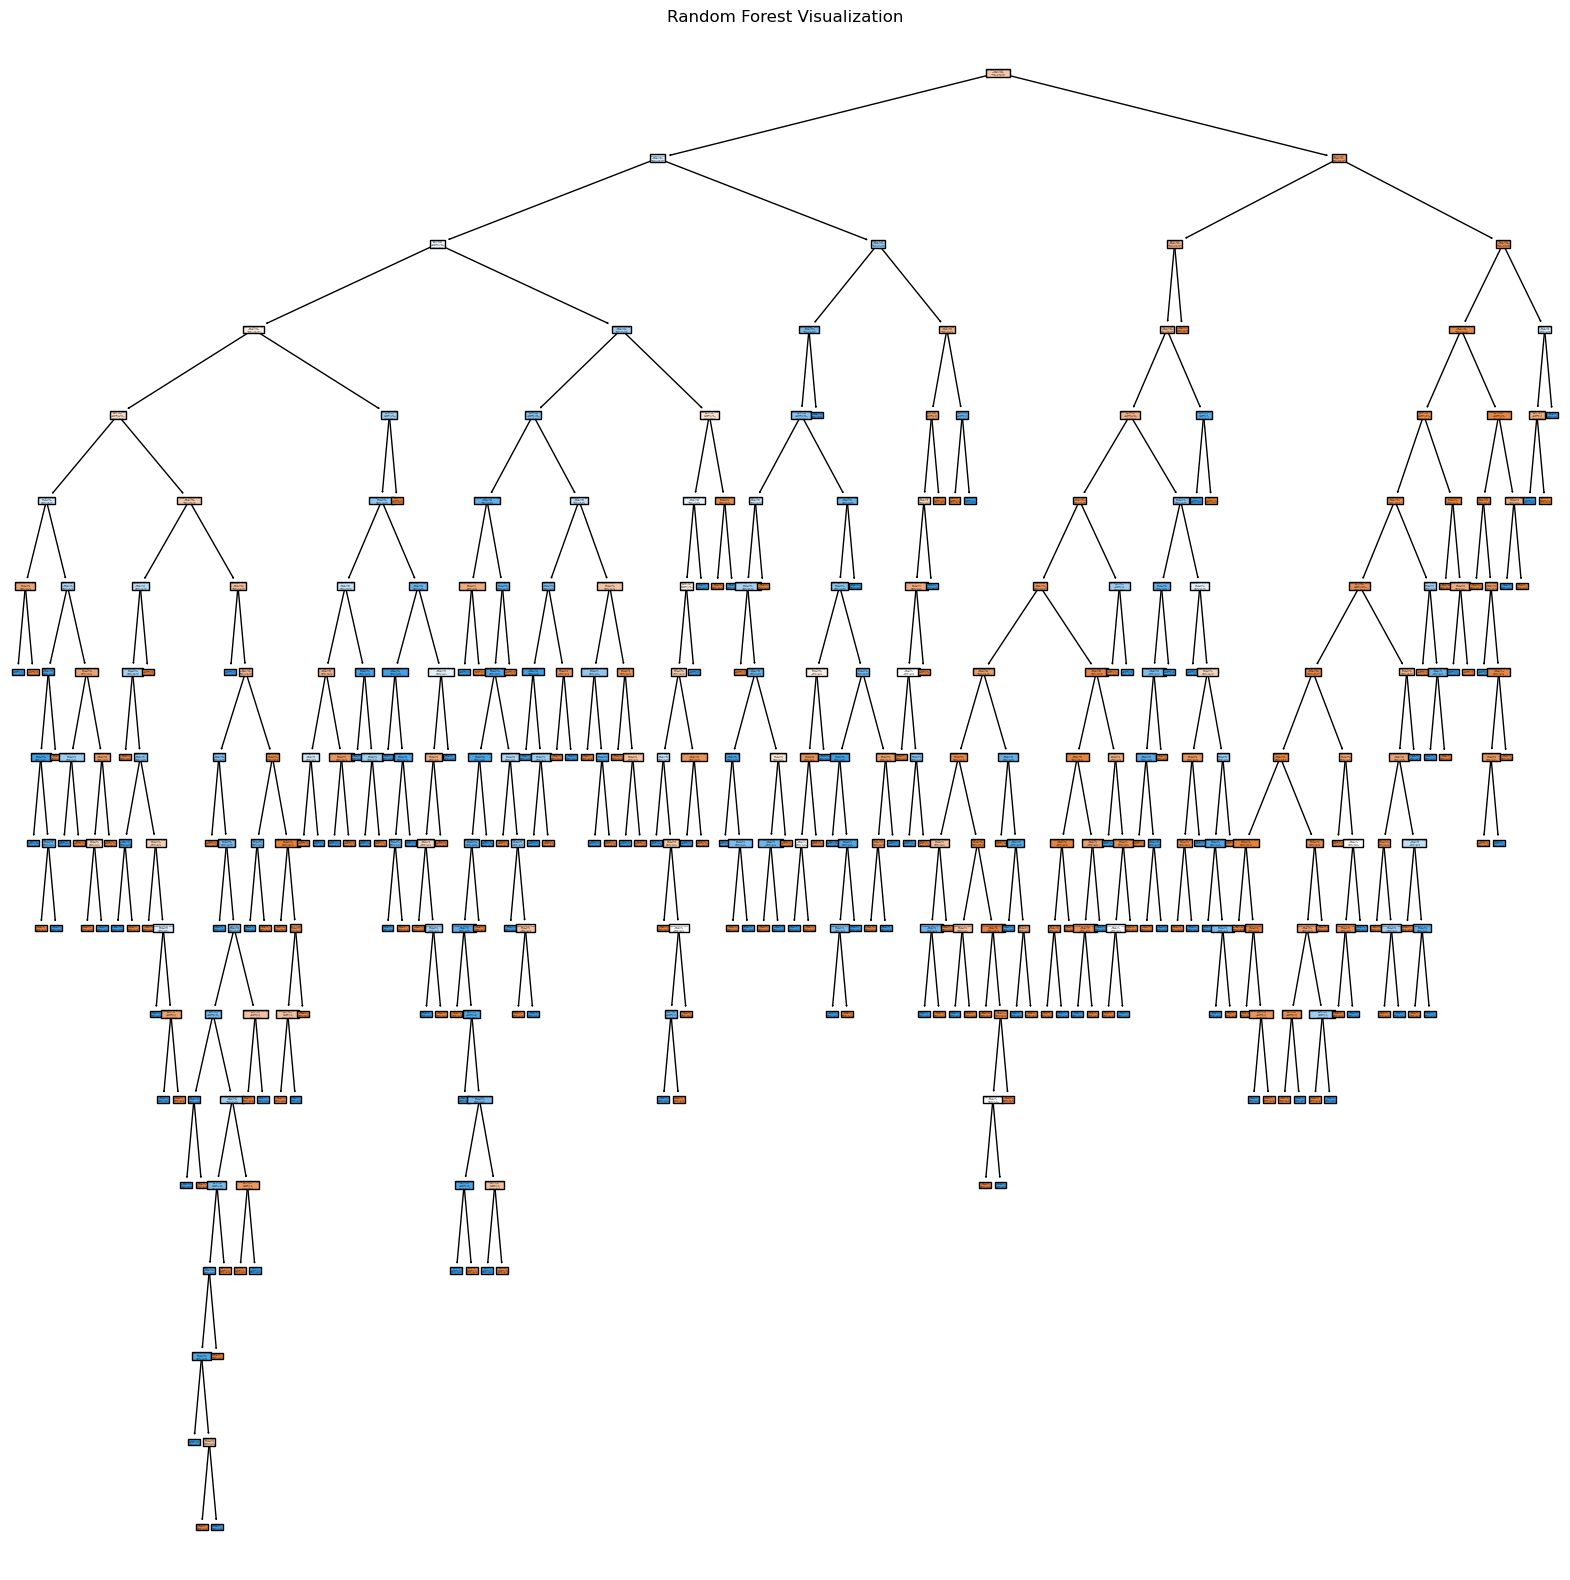

In [1251]:
#Random Forest:
plt.figure(figsize=(20,20))
plot_tree(clf.estimators_[0],feature_names=x.columns,class_names=['Class 0', 'Class 1'],filled=True)
plt.title("Random Forest Visualization")
plt.show()

Accuracy of each models:
----------------------------
logistic_acc=95.81
decision_tree_acc=90.69
bayes_acc=78.13
Svc_acc=85.11
Random_forest_acc=95.81

**Conclusion**:
----------------------
*The Random Forest Agorithm has given  accuracy of *94.8%* among all the other models.
-------------------------
*Hence, WE will bw selecting Random Forest.
----------------------------